In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import pylab 

from scipy.optimize import fmin
from scipy.stats import norm, ks_2samp, kstest, exponweib, probplot
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import scipy.stats as stats
from scipy.optimize import curve_fit
from lmfit import Model
from numpy import exp, loadtxt, pi, sqrt, linspace
from math import log, sqrt, erf

In [2]:
dados = pd.read_csv(r'C:\Users\Filipe Prates\Documents\Projects\Datasets\Dados-medicos.csv',delimiter = " ")
dados = dados.drop(columns=['Unnamed: 1','Unnamed: 2']) #Pequeno erro na leitura do csv

In [3]:
dados.columns = ['Idade','Peso','Carga Final','VO2']
dados

,Idade,Peso,Carga Final,VO2
0,49,79.1,250.0,49.051833
1,30,52.4,177.0,41.603053
2,56,65.8,140.0,32.674772
3,29,78.0,400.0,59.102564
4,49,69.2,242.0,48.410405
5,38,72.0,330.0,51.944444
6,20,68.6,240.0,42.857143
7,39,69.7,350.0,59.655667
8,19,62.7,220.0,45.614035
9,26,65.5,290.0,65.496183


Calcular o histograma e a função distribuição empírica para as seguintes variáveis: idade, peso, carga final, VO2 máximo.

Decidindo os bins: 

Poderiamos usar a Regra de Sturge             K = 1 + 3. 322 logN   , N = 1172
e obtemos K = 11.2256668021, mas como temos várias instâncias, e que não necessáriamente possuem distribuições simétricas, é melhor escolher os bins de outra maneira.

In [4]:
dados.describe()

,Idade,Peso,Carga Final,VO2
count,1172.000000,1172.000000,1172.000000,1172.000000
mean,53.290956,85.925776,172.271502,29.394728
std,14.746297,14.799113,70.093124,10.497250
min,18.000000,45.300000,30.000000,5.846847
25%,42.000000,76.100000,120.000000,21.797423
50%,54.000000,83.700000,170.000000,28.326660
75%,64.000000,94.450000,220.000000,35.853793
max,91.000000,178.900000,432.000000,73.333333


Vemos que o minimo e máximo para as variáveis são os seguintes:<br>
        Min  /   Max<br>
Idade:  18    /    91<br>
Peso:   45    /   178<br>
CargF:  30    /   432<br>
VO2:   5.8   /   73.3<br>





Delta:<br>
Idade: 73<br>
Peso: 133<br>
CargF:402<br>
VO2: 67.5<br>

sqrt(Delta):<br>
Idade: 8.54 =~ 9<br>
Peso: 11.53 =~ 12<br>
CargF: 20.04 =~ 20<br>
VO2: 8.21 =~ 9<br>

Levando isso em conta, e com um pouco de tentativa e erro temos os bins:<br>
Idade: 13<br>
Peso: 18<br>
CargF: 22<br>
VO2: 20<br>
    

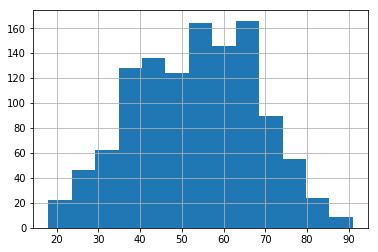

In [5]:
dados['Idade'].hist(bins=13)

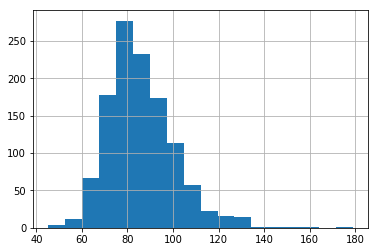

In [6]:
dados['Peso'].hist(bins=18)

Percebemos que temos outliers, removemos para o histograma melhor representar os dados

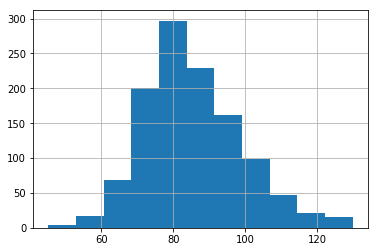

In [76]:
PesoSem = dados['Peso'][~((dados['Peso']-dados['Peso'].mean()).abs() > 3*dados['Peso'].std())]
PesoSem.hist(bins=11)

In [ ]:
dados['Carga Final'].hist(bins=22)

In [ ]:
dados['VO2'].hist(bins=20)

Observamos que a "Idade" se assemelha a uma curva Normal, como esperávamos, também observamos uma Idade média elevada(53) se comparado à população total, mostrando que os Dados vem de um subset específico da população. Se aumentarmos o número de bins, parece que temos um "segundo pico", como se fosse uma curva Bimodal com médias ~45, ~60. 

No "Peso" observamos que existiam alguns valores "fora da curva" que acabam "ocupando" bins que poderiam ser usados para melhor representar os dados, sem tais instâncias chegamos a uma outra curva que se assemelha a uma curva Normal.

Já no "Carga Final" é diferente, claramente temos uma curva que pode ser modelada. A primeira vista parece uma distribuição de Poisson

A do "VO2" é mais inconclusiva, poderia ser quase uma Normal, mas também poderia ser outra distribuição

In [ ]:
dados.mean()

In [ ]:
dados.var()

In [ ]:
sns.boxplot(data=dados)

In [ ]:
sns.violinplot(data=dados)

Observamos que tanto "Idade" quanto 'Peso" possuem variâncias muito semelhantes, o que pode ser um argumento a favor das duas serem distribuições Normais.
Além disso vemos que a Carga Final possui uma variância significativamente maior que as outras variáveis

In [7]:
def exponencial(x, lambd):
    if x.any() != 0:
        return lambd*exp((-1)*lambd*x)
    else:
        return 0

In [8]:
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

In [9]:
def lognorm(x,mu=0,sigma=1):
    a = (math.log(x) - mu)/math.sqrt(2*sigma**2)
    p = 0.5 + 0.5*math.erf(a)
    return p

In [ ]:
#Usando a biblioteca lmfit
emodel = Model(gaussian)

In [ ]:
result = emodel.fit(pmfId,params, x=x,nan_policy='raise')

CDF das variáveis

In [ ]:
num_bins = 20
counts, bin_edges = np.histogram(dados['Idade'], bins=num_bins, normed=True)
cdf = np.cumsum(counts)
plt.plot(bin_edges[1:], cdf)

In [ ]:
num_bins = 20
counts, bin_edges = np.histogram(dados['Peso'], bins=num_bins, normed=True)
cdf = np.cumsum(counts)
plt.plot(bin_edges[1:], cdf)

In [ ]:
num_bins = 20
counts, bin_edges = np.histogram(dados['Carga Final'], bins=num_bins, normed=True)
cdf = np.cumsum(counts)
plt.plot(bin_edges[1:], cdf)

In [ ]:
num_bins = 20
counts, bin_edges = np.histogram(dados['VO2'], bins=num_bins, normed=True)
cdf = np.cumsum(counts)
plt.plot(bin_edges[1:], cdf)

PMF das variáveis

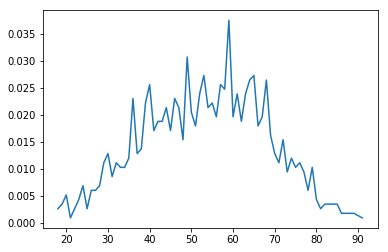

In [10]:
pmfId = dados['Idade'].value_counts().sort_index() / 1172
pmfId.plot()

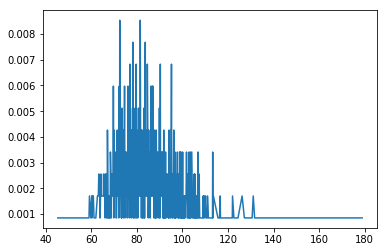

In [78]:
pmfPs = dados['Peso'].value_counts().sort_index() / 1172
pmfPs.plot()

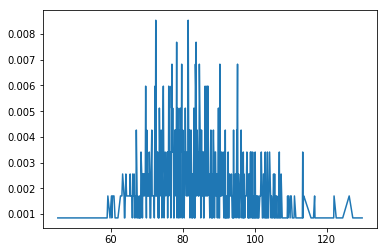

In [77]:
pmfPsS = PesoSem.value_counts().sort_index() / 1172
pmfPsS.plot()

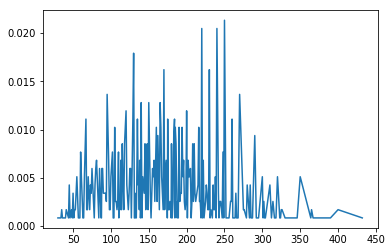

In [12]:
pmfCf = dados['Carga Final'].value_counts().sort_index() / 1172
pmfCf.plot()

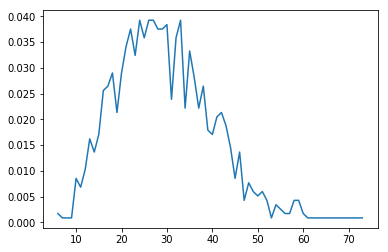

In [13]:
a = np.around(dados['VO2'],decimals=0)
pmfVO = a.value_counts().sort_index() / 1172
pmfVO.plot()

Fitando a Exponencial:
Podemos provar que a função Likelihood tem valor máximo quando Lambda = 1/média

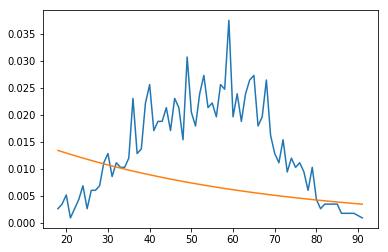

In [14]:
x = linspace(pmfId.index[0],pmfId.index[-1],100)
pmfId.plot()
plt.plot(x,exponencial(x,1/dados['Idade'].mean()))
plt.show()

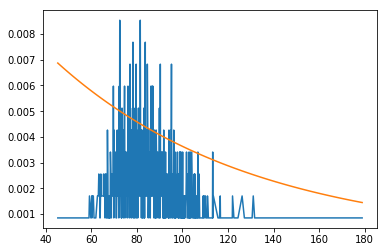

In [15]:
x = linspace(pmfPs.index[0],pmfPs.index[-1],100)
pmfPs.plot()
plt.plot(x,exponencial(x,1/dados['Peso'].mean()))
plt.show()

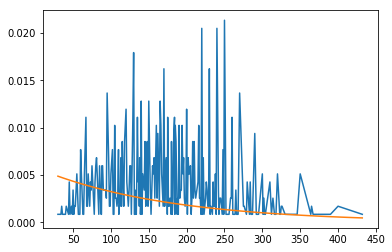

In [16]:
x = linspace(pmfCf.index[0],pmfCf.index[-1],100)
pmfCf.plot()
plt.plot(x,exponencial(x,1/dados['Carga Final'].mean()))
plt.show()

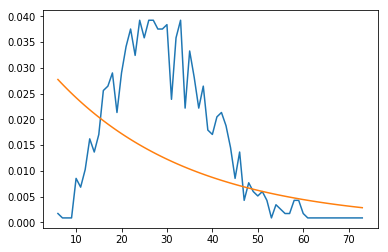

In [17]:
x = linspace(pmfVO.index[0],pmfVO.index[-1],100)
pmfVO.plot()
plt.plot(x,exponencial(x,1/dados['VO2'].mean()))
plt.show()

derivative(Log(P()))/dmu = (1/sig^2)*(v1 + v2 + v3... + vn - n*mu)
derivative(Log(P()))/dmu = 0

mu = (v1 + v2 ... + vn)/n

derivative(Log(P()))/dsig = (-1)*N + 1/sig^3*((v1 - mu)^2 + (v1 - mu)^2 + ... + (vn- mu)^2)
derivative(Log(P()))/dsig = 0

sig = sqrt((1/n)*((v1 - mu)^2 + (v1 - mu)^2 + ... + (vn- mu)^2))


In [ ]:
mu

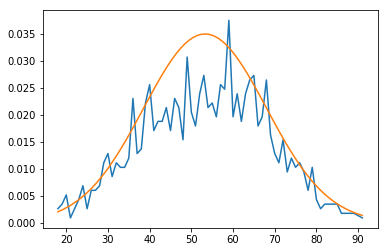

In [18]:
mu = dados['Idade'].mean()
a = 0
for i in range(0,1172):
    a = a + (dados['Idade'][i] - mu)**2
    
sig = sqrt((1/len(dados['Idade']))*a)

x = linspace(pmfId.index[0],pmfId.index[-1],len(pmfId))
pmfId.plot()
plt.plot(x,gaussian(x,mu,sig)*0.035)
plt.show()

In [ ]:
sig

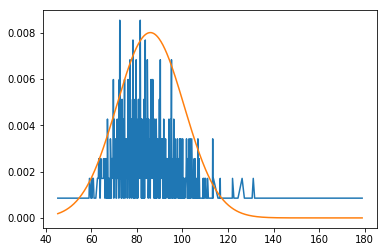

In [19]:
mu = dados['Peso'].mean()
a = 0
for i in range(0,1172):
    a = a + (dados['Peso'][i] - mu)**2
    
sig = sqrt((1/len(dados['Peso']))*a)

x = linspace(pmfPs.index[0],pmfPs.index[-1],len(pmfPs))
pmfPs.plot()
plt.plot(x,gaussian(x,mu,sig)*0.008)
plt.show()

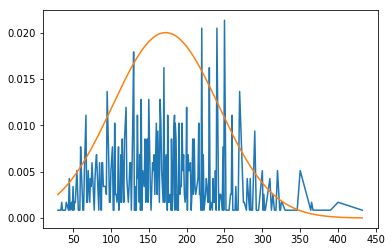

In [21]:
mu = dados['Carga Final'].mean()
a = 0
for i in range(0,1172):
    a = a + (dados['Carga Final'][i] - mu)**2
    
sig = sqrt((1/len(dados['Carga Final']))*a)

x = linspace(pmfCf.index[0],pmfCf.index[-1],len(pmfCf))
pmfCf.plot()
plt.plot(x,gaussian(x,mu,sig)*0.020)
plt.show()

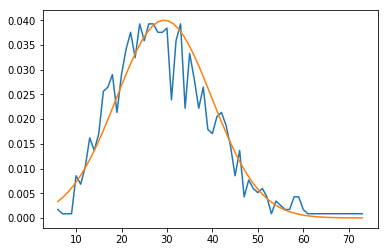

In [20]:
mu = dados['VO2'].mean()
a = 0
for i in range(0,1172):
    a = a + (dados['VO2'][i] - mu)**2
    
sig = sqrt((1/len(dados['VO2']))*a)

x = linspace(pmfVO.index[0],pmfVO.index[-1],len(pmfVO))
pmfVO.plot()
plt.plot(x,gaussian(x,mu,sig)*0.040)
plt.show()

Let μ and σ be parameters of the corresponding Normal distribution (its mean and standard deviation, respectively). Given the lognormal mean m and the value z for percentile α, we need to find μ and σ>0.

To this end, let Φ be the standard Normal distribution function. The two pieces of information are

m=exp(μ+σ2/2), whence μ+σ2/2=log(m).

log(z)=μ+σΦ−1(α).
Subtracting the second from the first and multiplying by 2 produces

σ2−2Φ−1(α)σ+2(log(z)−log(m))=0.
This is a quadratic equation in σ, solved with the usual Quadratic Formula. There will be zero, one, or two solutions. Two solutions are likely to occur when α is close to 1.

μ is then found in terms of σ by using either of the original equations; for instance,

μ=log(m)−σ2/2
will do nicely.

(A special case is when α=1/2, corresponding to the median, where Φ−1(α)=0. The formula for σ simplifies to
σ2+2(log(z)−log(m))=0.

In [22]:
def lognorm(x,mu=0,sigma=1):
    a = (log(x) - mu)/sqrt(2*sigma**2)
    p = 0.5 + 0.5*math.erf(a)
    return p*m

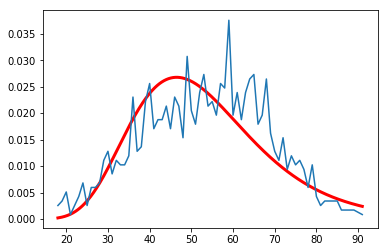

In [27]:
shape, loc, scale = stats.lognorm.fit(dados['Idade'], floc=0)
u = np.log(scale) # Mean of log(X)
sigma = shape # Standard deviation of log(X)
M = np.exp(mu) # Geometric mean == median
s = np.exp(sigma) # Geometric standard deviation

x = np.linspace(dados['Idade'].min(), dados['Idade'].max(), num=400)
plt.plot(x, stats.lognorm.pdf(x, shape, loc=0, scale=scale), 'r', linewidth=3) # Plot fitted curve
ax = plt.gca() # Get axis handle for text positioning
#txt = plt.text(0.9, 0.9, 'M = %.2f\ns = %.2f' % (M, s), horizontalalignment='right', 
                #size='large', verticalalignment='top', transform=ax.transAxes)

pmfId.plot()


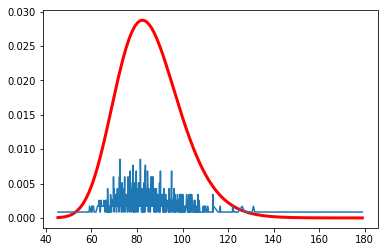

In [28]:
shape, loc, scale = stats.lognorm.fit(dados['Peso'], floc=0)
u = np.log(scale) # Mean of log(X)
sigma = shape # Standard deviation of log(X)
M = np.exp(mu) # Geometric mean == median
s = np.exp(sigma) # Geometric standard deviation

x = np.linspace(dados['Peso'].min(), dados['Peso'].max(), len(dados['Peso']))
plt.plot(x, stats.lognorm.pdf(x, shape, loc=0, scale=scale), 'r', linewidth=3) # Plot fitted curve
ax = plt.gca() # Get axis handle for text positioning
#txt = plt.text(0.9, 0.9, 'M = %.2f\ns = %.2f' % (M, s), horizontalalignment='right', 
                #size='large', verticalalignment='top', transform=ax.transAxes)

pmfPs.plot()

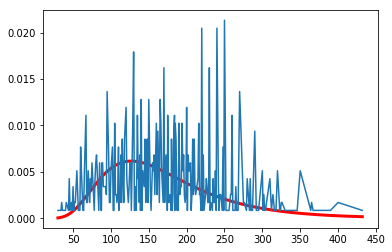

In [29]:
shape, loc, scale = stats.lognorm.fit(dados['Carga Final'], floc=0)
u = np.log(scale) # Mean of log(X)
sigma = shape # Standard deviation of log(X)
M = np.exp(mu) # Geometric mean == median
s = np.exp(sigma) # Geometric standard deviation

x = np.linspace(dados['Carga Final'].min(), dados['Carga Final'].max(), len(dados['Carga Final']))
plt.plot(x, stats.lognorm.pdf(x, shape, loc=0, scale=scale), 'r', linewidth=3) # Plot fitted curve
ax = plt.gca() # Get axis handle for text positioning
#txt = plt.text(0.9, 0.9, 'M = %.2f\ns = %.2f' % (M, s), horizontalalignment='right', 
                #size='large', verticalalignment='top', transform=ax.transAxes)

pmfCf.plot()

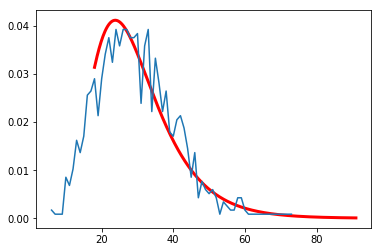

In [67]:
shape, loc, scale = stats.lognorm.fit(dados['VO2'], floc=0)
u = np.log(scale) # Mean of log(X)
sigma = shape # Standard deviation of log(X)
M = np.exp(mu) # Geometric mean == median
s = np.exp(sigma) # Geometric standard deviation

x = np.linspace(dados['Idade'].min(), dados['Idade'].max(), num=400)
plt.plot(x, stats.lognorm.pdf(x, shape, loc=0, scale=scale), 'r', linewidth=3) # Plot fitted curve


pmfVO.plot()


In [44]:
def weib(x,n,a):
    return (a / n) * (x / n)**(a - 1) * np.exp(-(x / n)**a)

In [55]:
weib(10,5,)

0.0

In [39]:
def fitweibull(x):
    def optfun(theta):
        return -np.sum(np.log(exponweib.pdf(x, 1, theta[0], scale = theta[1], loc = 0)))
    logx = np.log(x)
    shape = 1.2 / np.std(logx)
    scale = np.exp(np.mean(logx) + (0.572 / shape))
    return fmin(optfun, [shape, scale], xtol = 0.01, ftol = 0.01, disp = 0)

In [59]:
print(fitweibull(dados['Idade']))
print(fitweibull(dados['Peso']))
print(fitweibull(dados['Carga Final']))
print(fitweibull(dados['VO2']))

[ 4.08972189 58.78471149]
[ 5.40790274 92.23763382]
[  2.64697108 194.04146951]
[ 2.99713712 32.92725915]


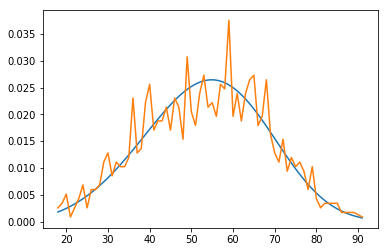

In [61]:
x = linspace(pmfId.index[0],pmfId.index[-1],len(pmfId))
plt.plot(x, weib(x, fitweibull(dados['Idade'])[1], fitweibull(dados['Idade'])[0]))
pmfId.plot()
plt.show()

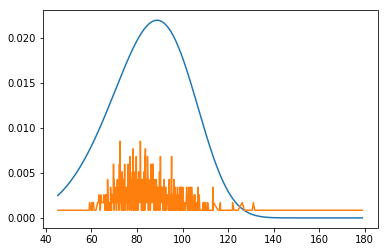

In [62]:
x = linspace(pmfPs.index[0],pmfPs.index[-1],len(pmfPs))
plt.plot(x, weib(x, fitweibull(dados['Peso'])[1], fitweibull(dados['Peso'])[0]))
pmfPs.plot()
plt.show()

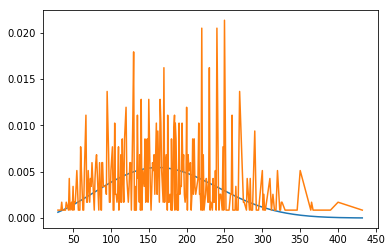

In [63]:
x = linspace(pmfCf.index[0],pmfCf.index[-1],len(pmfCf))
plt.plot(x, weib(x, fitweibull(dados['Carga Final'])[1], fitweibull(dados['Carga Final'])[0]))
pmfCf.plot()
plt.show()

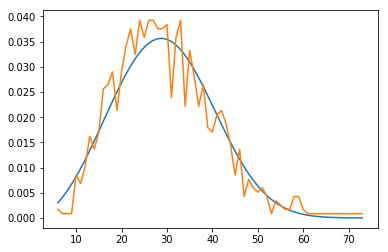

In [64]:
x = linspace(pmfVO.index[0],pmfVO.index[-1],len(pmfVO))
plt.plot(x, weib(x, fitweibull(dados['VO2'])[1], fitweibull(dados['VO2'])[0]))
pmfVO.plot()
plt.show()

In [ ]:
stats.probplot(pmfCf, dist='norm', plot=pylab)
pylab.show()

Plots com todas as distribuições Parametrizadas

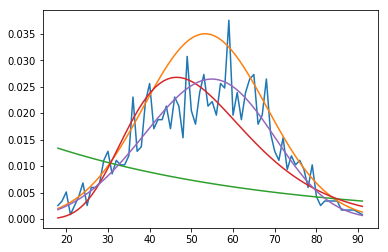

In [134]:
pmfId.plot()

mu = dados['Idade'].mean()
a = 0
for i in range(0,1172):
    a = a + (dados['Idade'][i] - mu)**2
    
sig = sqrt((1/len(dados['Idade']))*a)
x = linspace(pmfId.index[0],pmfId.index[-1],len(pmfId))
plt.plot(x,gaussian(x,mu,sig)*0.035)

plt.plot(x,exponencial(x,1/dados['Idade'].mean()))

shape, loc, scale = stats.lognorm.fit(dados['Idade'], floc=0)
u = np.log(scale)
sigma = shape
M = np.exp(mu)
s = np.exp(sigma)

plt.plot(x, stats.lognorm.pdf(x, shape, loc=0, scale=scale))

plt.plot(x, weib(x, fitweibull(dados['Idade'])[1], fitweibull(dados['Idade'])[0]))

plt.show()

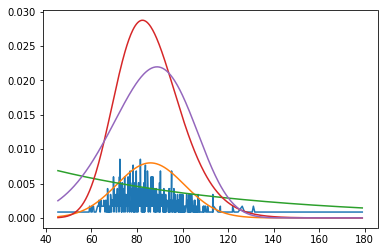

In [95]:
pmfPs.plot()

mu = dados['Peso'].mean()
a = 0
for i in range(0,1172):
    a = a + (dados['Peso'][i] - mu)**2
    
sig = sqrt((1/len(dados['Peso']))*a)
x = linspace(pmfPs.index[0],pmfPs.index[-1],len(pmfPs))
plt.plot(x,gaussian(x,mu,sig)*0.008)

plt.plot(x,exponencial(x,1/dados['Peso'].mean()))

shape, loc, scale = stats.lognorm.fit(dados['Peso'], floc=0)
u = np.log(scale)
sigma = shape
M = np.exp(mu)
s = np.exp(sigma)

plt.plot(x, stats.lognorm.pdf(x, shape, loc=0, scale=scale))

plt.plot(x, weib(x, fitweibull(dados['Peso'])[1], fitweibull(dados['Peso'])[0]))

plt.show()

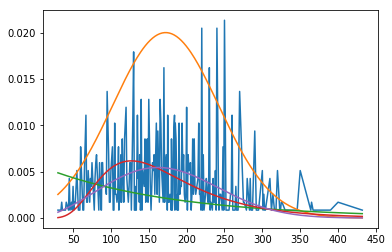

In [93]:
pmfCf.plot()

mu = dados['Carga Final'].mean()
a = 0
for i in range(0,1172):
    a = a + (dados['Carga Final'][i] - mu)**2
    
sig = sqrt((1/len(dados['Carga Final']))*a)
x = linspace(pmfCf.index[0],pmfCf.index[-1],len(pmfCf))
plt.plot(x,gaussian(x,mu,sig)*0.020)

plt.plot(x,exponencial(x,1/dados['Carga Final'].mean()))

shape, loc, scale = stats.lognorm.fit(dados['Carga Final'], floc=0)
u = np.log(scale)
sigma = shape
M = np.exp(mu)
s = np.exp(sigma)

plt.plot(x, stats.lognorm.pdf(x, shape, loc=0, scale=scale))

plt.plot(x, weib(x, fitweibull(dados['Carga Final'])[1], fitweibull(dados['Carga Final'])[0]))

plt.show()

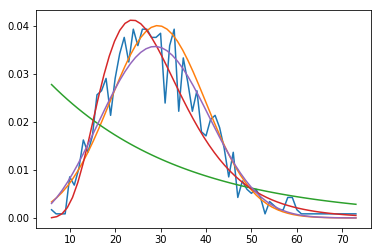

In [87]:
pmfVO.plot()

mu = dados['VO2'].mean()
a = 0
for i in range(0,1172):
    a = a + (dados['VO2'][i] - mu)**2
    
sig = sqrt((1/len(dados['VO2']))*a)
x = linspace(pmfVO.index[0],pmfVO.index[-1],len(pmfVO))
plt.plot(x,gaussian(x,mu,sig)*0.040)

plt.plot(x,exponencial(x,1/dados['VO2'].mean()))

shape, loc, scale = stats.lognorm.fit(dados['VO2'], floc=0)
u = np.log(scale)
sigma = shape
M = np.exp(mu)
s = np.exp(sigma)

plt.plot(x, stats.lognorm.pdf(x, shape, loc=0, scale=scale))

plt.plot(x, weib(x, fitweibull(dados['VO2'])[1], fitweibull(dados['VO2'])[0]))

plt.show()

Probability Plots

Gaussiana

((array([-3.24306909, -2.98130086, -2.83544287, ...,  2.83544287,
          2.98130086,  3.24306909]),
  array([18, 18, 18, ..., 89, 89, 91], dtype=int64)),
 (14.726904011143002, 53.29095563139932, 0.9966957839585983))

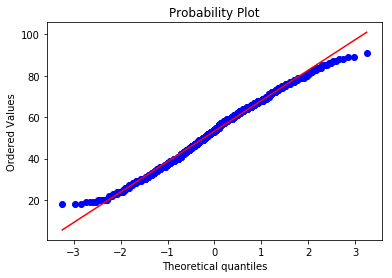

In [127]:
probplot(dados['Idade'],dist='norm',plot=plt)

((array([-3.24306909, -2.98130086, -2.83544287, ...,  2.83544287,
          2.98130086,  3.24306909]),
  array([ 45.3,  46.8,  51.1, ..., 154.6, 160. , 178.9])),
 (14.48840413761961, 85.92577645051195, 0.9770549622892412))

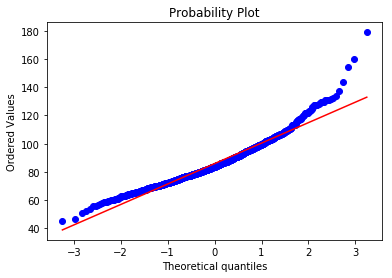

In [128]:
probplot(dados['Peso'],dist='norm',plot=plt)

((array([-3.24306909, -2.98130086, -2.83544287, ...,  2.83544287,
          2.98130086,  3.24306909]),
  array([ 30.,  34.,  35., ..., 400., 400., 432.])),
 (69.7512222011626, 172.27150170648466, 0.9931401692888352))

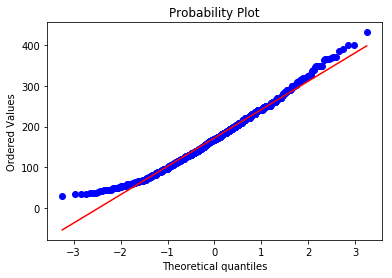

In [129]:
probplot(dados['Carga Final'],dist='norm',plot=plt)

((array([-3.24306909, -2.98130086, -2.83544287, ...,  2.83544287,
          2.98130086,  3.24306909]),
  array([ 5.84684685,  6.03448276,  7.33590734, ..., 65.49618321,
         68.12834225, 73.33333333])),
 (10.42522015742807, 29.394727923153155, 0.9911601661745802))

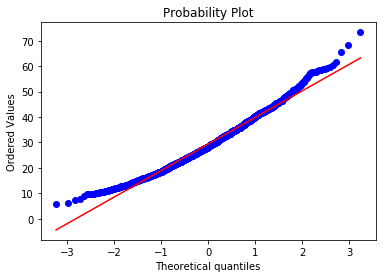

In [130]:
probplot(dados['VO2'],dist='norm',plot=plt)

LogNormal

((array([ 18.91859948,  20.4963212 ,  21.431832  , ..., 121.52771519,
         127.07458815, 137.67200783]),
  array([18, 18, 18, ..., 89, 89, 91], dtype=int64)),
 (0.8556775868732767, 7.539697442472786, 0.9684164968717186))

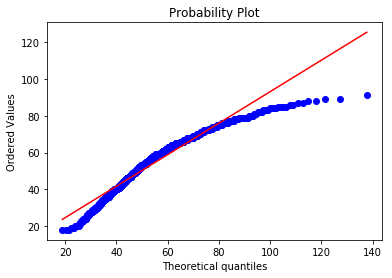

In [144]:
shape, loc, scale = stats.lognorm.fit(dados['Idade'], floc=0)
probplot(dados['Idade'],dist='lognorm',sparams = (shape, loc, scale), plot=plt)

((array([ 49.44197437,  51.6390261 ,  52.90531187, ..., 135.69369366,
         139.02115751, 145.19883707]),
  array([ 45.3,  46.8,  51.1, ..., 154.6, 160. , 178.9])),
 (1.0257060013351469, -2.1817797939528845, 0.9932560220346702))

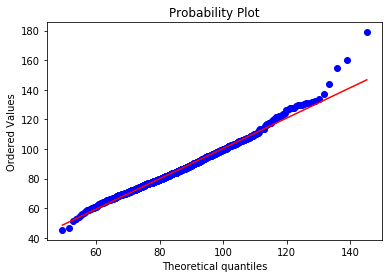

In [145]:
shape, loc, scale = stats.lognorm.fit(dados['Peso'], floc=0)
probplot(dados['Peso'],dist='lognorm',sparams = (shape, loc, scale), plot=plt)

((array([ 35.4208971 ,  39.93908446,  42.7021607 , ..., 575.39645542,
         615.20368431, 693.67728989]),
  array([ 30.,  34.,  35., ..., 400., 400., 432.])),
 (0.815635515271155, 30.32826446131017, 0.9735055198369348))

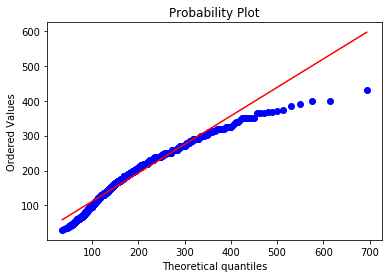

In [146]:
shape, loc, scale = stats.lognorm.fit(dados['Carga Final'], floc=0)
probplot(dados['Carga Final'],dist='lognorm',sparams = (shape, loc, scale), plot=plt)

((array([ 8.03738306,  8.87567845,  9.38014814, ..., 80.47001196,
         85.04371105, 93.91373128]),
  array([ 5.84684685,  6.03448276,  7.33590734, ..., 65.49618321,
         68.12834225, 73.33333333])),
 (0.8998884516657266, 2.8406129218628635, 0.9894498443426679))

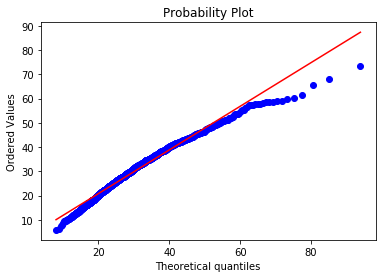

In [147]:
shape, loc, scale = stats.lognorm.fit(dados['VO2'], floc=0)
probplot(dados['VO2'],dist='lognorm',sparams = (shape, loc, scale), plot=plt)

Exponencial

((array([0.01935633, 0.02020107, 0.02105564, ..., 6.09879407, 6.56526248,
         7.4520405 ]), array([18, 18, 18, ..., 89, 89, 91], dtype=int64)),
 (13.202669460646549, 39.85829790339259, 0.88945364869707))

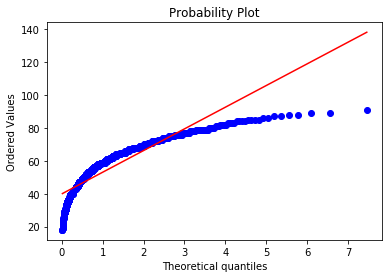

In [163]:
probplot(dados['Idade'],dist='expon',sparams = (1/dados['Idade'].mean()), plot=plt)

((array([0.01222937, 0.01307412, 0.01392868, ..., 6.09166711, 6.55813552,
         7.44491354]), array([ 45.3,  46.8,  51.1, ..., 154.6, 160. , 178.9])),
 (14.453054786157724, 71.32395822483615, 0.9702161455390663))

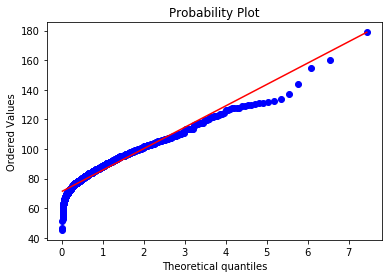

In [164]:
probplot(dados['Peso'],dist='expon',sparams = (1/dados['Peso'].mean()), plot=plt)

((array([6.39621315e-03, 7.24095468e-03, 8.09552229e-03, ...,
         6.08583395e+00, 6.55230236e+00, 7.43908038e+00]),
  array([ 30.,  34.,  35., ..., 400., 400., 432.])),
 (66.35842181031414, 105.61714050445124, 0.940513817554835))

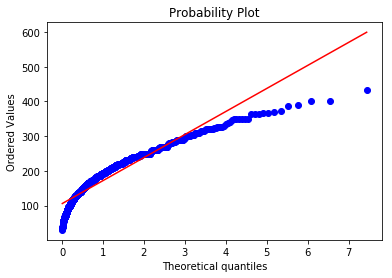

In [165]:
probplot(dados['Carga Final'],dist='expon',sparams = (1/dados['Carga Final'].mean()), plot=plt)

((array([0.03461113, 0.03545587, 0.03631044, ..., 6.11404887, 6.58051728,
         7.46729529]),
  array([ 5.84684685,  6.03448276,  7.33590734, ..., 65.49618321,
         68.12834225, 73.33333333])),
 (10.04049508133471, 19.02616341596149, 0.9502199361244666))

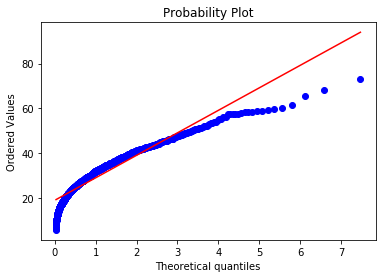

In [166]:
probplot(dados['VO2'],dist='expon',sparams = (1/dados['VO2'].mean()), plot=plt)

Weibul

((array([3.05500904, 3.05724268, 3.05854019, ..., 3.18796405, 3.19509787,
         3.20849848]), array([18, 18, 18, ..., 89, 89, 91], dtype=int64)),
 (668.773333213228, -2019.3999731917233, 0.9643950830297935))

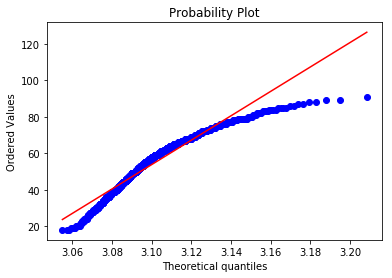

In [158]:
probplot(dados['Idade'],dist='weibull_max',sparams = (fitweibull(dados['Idade'])[1], fitweibull(dados['Idade'])[0]), plot=plt)

((array([4.38591673, 4.38732331, 4.38814089, ..., 4.47168257, 4.47640962,
         4.48532637]), array([ 45.3,  46.8,  51.1, ..., 154.6, 160. , 178.9])),
 (1081.1285678675188, -4686.213080058958, 0.997564724383223))

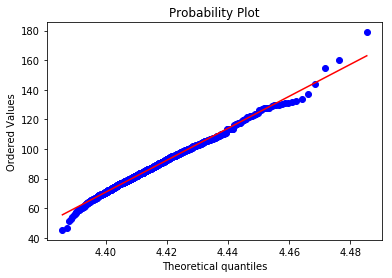

In [157]:
probplot(dados['Peso'],dist='weibull_max',sparams = (fitweibull(dados['Peso'])[1], fitweibull(dados['Peso'])[0]), plot=plt)

((array([1.63657963, 1.63724091, 1.6376255 , ..., 1.67781321, 1.68014236,
         1.68455282]), array([ 30.,  34.,  35., ..., 400., 400., 432.])),
 (10593.080841901688, -17305.402634728776, 0.9879514748659668))

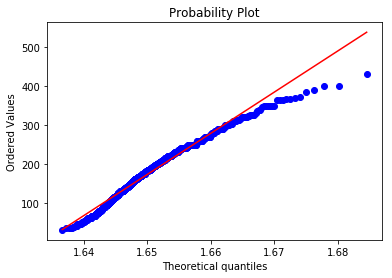

In [161]:
probplot(dados['Carga Final'],dist='weibull_max',sparams = (fitweibull(dados['Carga Final'])[1], fitweibull(dados['Carga Final'])[0]), plot=plt)

((array([1.93432201, 1.93841455, 1.94078868, ..., 2.16571325, 2.17741933,
         2.19921111]),
  array([ 5.84684685,  6.03448276,  7.33590734, ..., 65.49618321,
         68.12834225, 73.33333333])),
 (279.58303783134164, -533.6165190445298, 0.9951172110484183))

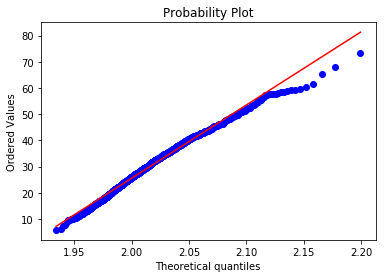

In [162]:
probplot(dados['VO2'],dist='weibull_max',sparams = (fitweibull(dados['VO2'])[1], fitweibull(dados['VO2'])[0]), plot=plt)

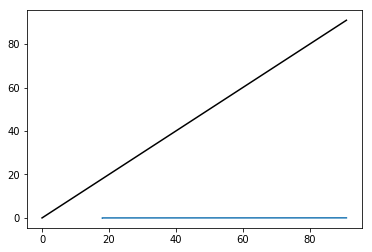

In [118]:
#Calculate quantiles
test1 = dados['Idade'].values
quantile_levels1 = np.arange(len(test1),dtype=float)/len(test1)

x = linspace(dados['Idade'].min(),dados['Idade'].max(),1172)
test2 = gaussian(x,mu,sig)*0.035
test2.sort()
quantile_levels2 = np.arange(len(test2),dtype=float)/len(test2)

#Use the smaller set of quantile levels to create the plot
quantile_levels = quantile_levels2

#We already have the set of quantiles for the smaller data set
quantiles2 = test2

#We find the set of quantiles for the larger data set using linear interpolation
quantiles1 = np.interp(quantile_levels,quantile_levels1,test1)

#Plot the quantiles to create the qq plot
pylab.plot(quantiles1,quantiles2)

#Add a reference line
maxval = max(test1[-1],test2[-1])
minval = min(test1[0],test2[0])
pylab.plot([minval,maxval],[minval,maxval],'k-')

pylab.show()

Análise de dependência entre variáveis

In [167]:
dados.corr()

,Idade,Peso,Carga Final,VO2
Idade,1.000000,0.644864,-0.373178,-0.596694
Peso,0.644864,1.000000,0.186422,-0.174401
Carga Final,-0.373178,0.186422,1.000000,0.878326
VO2,-0.596694,-0.174401,0.878326,1.000000


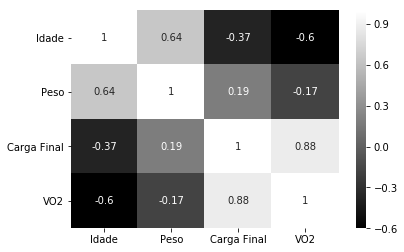

In [168]:
sns.heatmap(dados.corr(),annot=True,cmap = "gist_gray")

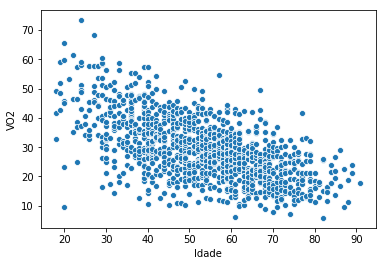

In [169]:
sns.scatterplot(x=dados['Idade'],y=dados['VO2'])

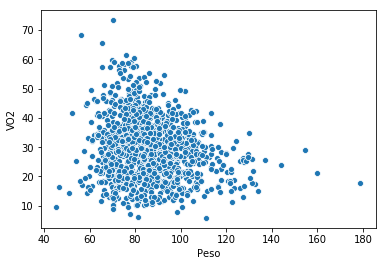

In [170]:
sns.scatterplot(x=dados['Peso'],y=dados['VO2'])

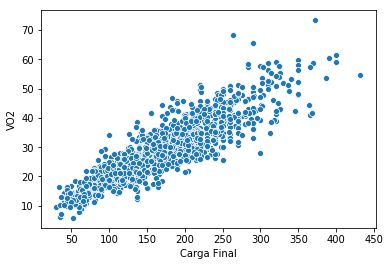

In [171]:
sns.scatterplot(x=dados['Carga Final'],y=dados['VO2'])

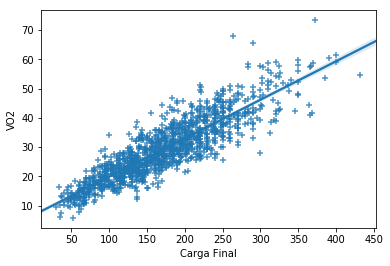

In [174]:
sns.regplot(x=dados['Carga Final'],y = dados['VO2'], marker = '+')

In [ ]:
# Split the data into training/testing sets
X_train = dados['Carga Final'][:-500]
X_test = dados['Carga Final'][-500:]

# Split the targets into training/testing sets
y_train = dados['VO2'][:-500]
y_test = dados['VO2'][-500:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train.values, y_train.values)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.show()